## LPC ANALYSIS

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  6 22:18:02 2021

@author: kenan
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp
import IPython
from scipy.io import wavfile
import librosa
from matplotlib.pyplot import figure

Write a computer program to compute the LPC coefficients for a frame of speech. Note:
You can use Durbin’s recursion

In [2]:
############################## a. Computing LPC coeffecients for a frame of speech
def bac(x, p):
    # computing the biased autocorrelation for x up to lag p
    L = len(x)
    r = np.zeros(p+1)
    for m in range(0, p+1):
        for n in range(0, L-m):
            r[m] += x[n] * x[n+m]
        r[m] /= float(L)
    return r


def ld(r, p):
    # Using the Levinson-Durbin algorithm
    g = r[1] / r[0]
    a = np.array([g])
    v = (1. - g * g) * r[0];
    for i in range(1, p):
        g = (r[i+1] - np.dot(a, r[1:i+1])) / v
        a = np.r_[ g,  a - g * a[i-1::-1] ]
        v *= 1. - g*g
    # Returning the coefficients of the filter
    return np.r_[1, -a[::-1]]


def lpc(x, p):
    # Computing p LPC coefficients for a frame of speech
    return ld(bac(x, p), p)

Compute the LPC coefficients for a voiced frame of speech using your own code. Compute
the LPC spectrum using the LPC coefficients and compare it with the DFT spectrum for the
same frame.

In [3]:
############################# b. using the code to calculate coeffecients to a voice
    
# A function for plotting
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)  # positive frequencies only
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X, color='blue')
    return N, X

In [5]:
!git clone https://github.com/keanmorani/Speech_Signal_Procssing_idu

fatal: destination path 'Speech_Signal_Procssing_idu' already exists and is not an empty directory.


In [6]:
Fs_y, y = wavfile.read('./data/soundmale.wav')

In [7]:
y = y / 32767.0 # cast to floats for 16bit sound file

In [8]:
y # The voice signal

array([-5.18814661e-04, -6.40888699e-04, -7.01925718e-04, ...,
        9.15555284e-05,  6.10370190e-05, -1.22074038e-04])

In [9]:
Fs_y # The sampling rate

22050

In [10]:
# The order of the filter is 22, corresponding to a sampling rate of about 22kHz, 
# meaning about 11 formants are to be an intial expectation
lpc(y, 22) # omputing LPC of the signal using the functions in 1

array([ 1.        , -4.0968931 ,  7.91074907, -9.25598136,  7.43413527,
       -5.24373629,  5.07557517, -6.22603274,  6.76073241, -6.21305864,
        5.55991905, -5.37336296,  5.20335248, -4.60063078,  3.82695766,
       -3.25211833,  2.77971457, -2.20358584,  1.60916652, -1.11343409,
        0.69499191, -0.32138512,  0.08324009])

In [11]:
librosa.lpc(y, 22) # omputing LPC of the signal using librosa library

array([ 1.        , -4.0969337 ,  7.91095825, -9.25651305,  7.43502812,
       -5.24488063,  5.07684691, -6.22741577,  6.76228481, -6.21479692,
        5.56178693, -5.3753061 ,  5.20536071, -4.60268144,  3.82897294,
       -3.25403248,  2.78155357, -2.20540415,  1.61088708, -1.11481609,
        0.69582967, -0.32171913,  0.08330591])

(array([0.00000000e+00, 3.51103468e-01, 7.02206936e-01, ...,
        1.10239467e+04, 1.10242978e+04, 1.10246489e+04]),
 array([-0.00051881, -0.00064089, -0.00070193, ..., -0.00167852,
        -0.00250252, -0.00262459]))

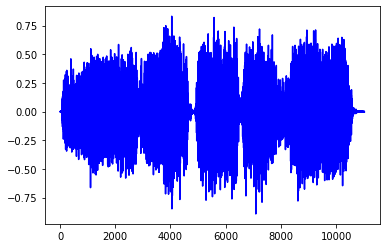

In [12]:
plot_spec(y, Fs_y, do_fft=False) # Spectrum plot no FFT

(array([0.00000000e+00, 3.51103468e-01, 7.02206936e-01, ...,
        1.10239467e+04, 1.10242978e+04, 1.10246489e+04]),
 array([4.02111881e-01, 1.82793197e+01, 3.84926047e+01, ...,
        2.98607662e-02, 2.37033789e-02, 1.85356957e-02]))

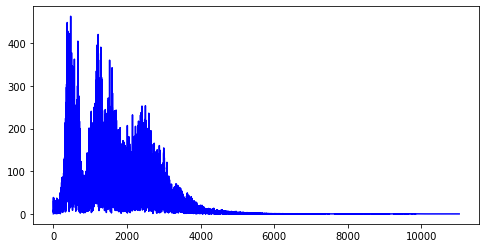

In [21]:
# The DFT is often computed using the FFT algorithm, a name informally used to refer to the DFT itself. 
# The DFT tells us which frequencies or “notes” to expect in our signal.
# Calculating FFT through the function plot_spec
figure(figsize=(8, 4))
plot_spec(y, Fs_y, do_fft=True) # Spectrum plot with FF6

In [18]:
spectrum = np.fft.fft(y) 
spectrum 

array([ -0.40211188+7.10542736e-15j, -12.53366981+1.33056623e+01j,
       -22.73056197-3.10644841e+01j, ...,  17.62446093-1.03634237e+00j,
       -22.73056197+3.10644841e+01j, -12.53366981-1.33056623e+01j])

(array([0.00000000e+00, 7.02206936e-01, 1.40441387e+00, ...,
        1.10225423e+04, 1.10232445e+04, 1.10239467e+04]),
 array([2.60994761e+01, 2.60995355e+01, 2.60997137e+01, ...,
        1.04342557e-02, 1.04342247e-02, 1.04342041e-02]))

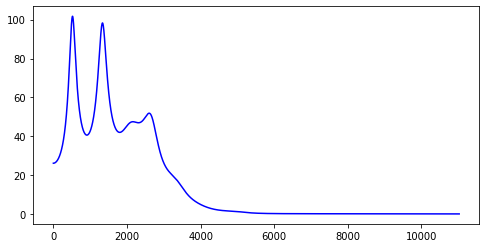

In [49]:
# Taking fft and then LPC on the frames
figure(figsize=(8, 4))
A = np.fft.fft(lpc(y, 22), int(len(y)/2))
plot_spec(np.abs(np.divide(1.0, A)), Fs_y, do_fft=False)

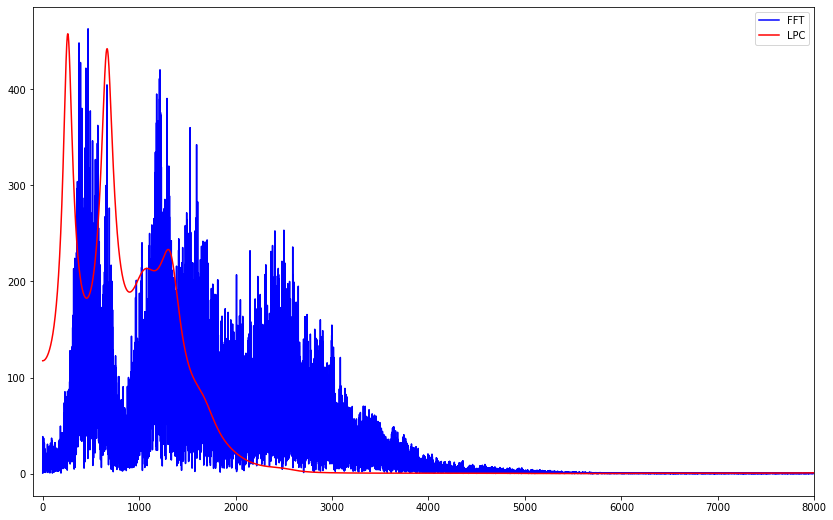

In [48]:
# Plotting FFT and LPC after fft on the same graph

figure(figsize=(14, 9))
C = int(len(y) / 2) # positive frequencies only
X = np.abs(np.fft.fft(y)[0:C])
A = np.fft.fft(lpc(y, 22), int(len(y)/2))
N = Fs_y * np.arange(0, C) / len(y)
plt.plot(N, X, color='blue', label='FFT')
plt.plot(N, np.abs(np.divide(4.5, A)), color='r', label='LPC')
plt.xlim(-100, 8000)
plt.legend()

(array([   0.        ,  958.69565217, 1917.39130435, 2876.08695652,
        3834.7826087 , 4793.47826087, 5752.17391304, 6710.86956522,
        7669.56521739, 8628.26086957, 9586.95652174]),
 array([ 1.        , -4.0968931 ,  7.91074907, -9.25598136,  7.43413527,
        -5.24373629,  5.07557517, -6.22603274,  6.76073241, -6.21305864,
         5.55991905]))

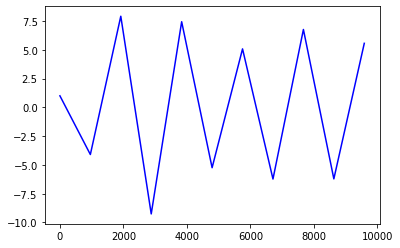

In [22]:
plot_spec(lpc(y,22), Fs_y, do_fft=False) # Computing and plotting LPC spectrum using LPC Coeffecients no fft